<a href="https://colab.research.google.com/github/phuhop97bg/IBM_Data-Science-/blob/master/Nhom3_PhuVanHop_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Các phép xử lý hình thái, phân vùng, biểu diễn và đối sánh ảnh**
**Nhóm 3:** 


1.   Phù Văn Hợp 20172583
2.   Phạm Thành Công 20182391
3.   Mai Xuân Phương 20163225
4.   Phạm Minh Ngọc 20172726

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

##**1) Áp dụng các hàm của OpenCV**, thực hiện các hàm lấy ngưỡng ảnh (lấy ngưỡng nhị phân toàn cục, Phương pháp otsu, lấy ngưỡng thích nghi) và nhận xét kết quả.##

In [2]:
img = cv2.imread("sudoku.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(226, 223)

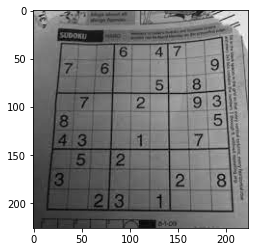

In [3]:
plt.imshow(img, cmap='gray')
img.shape

**1.a, Lấy ngưỡng nhị phân toàn cục**

In [4]:
ret, global_bin = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

**1.b, Lấy ngưỡng nhị phân Otsu**

In [5]:
ret, otsu_bin = cv2.threshold(img,127,255,cv2.THRESH_OTSU)

**1.c, Lấy ngưỡng thích nghi**

In [6]:
adaptive = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,45,5)

**1.d, Hiện thị kết quả và nhận xét**

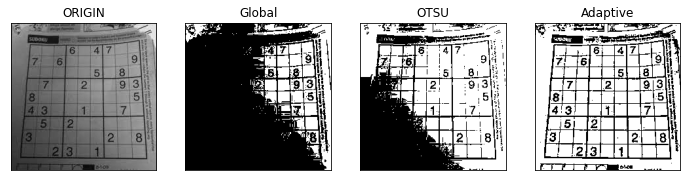

In [7]:
plt.subplots(1, 4, figsize=(12,12))
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('ORIGIN'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(global_bin, cmap = 'gray')
plt.title('Global'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(otsu_bin, cmap = 'gray')
plt.title('OTSU'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(adaptive, cmap = 'gray')
plt.title('Adaptive'), plt.xticks([]), plt.yticks([])
plt.show()

**NHẬN XÉT:** Lấy ngưỡng toàn cục không xử lý tốt với ảnh bị hiệu ứng chiếu sáng không đều. Phương pháp otsu xử lý tốt hơn một chút nhưng vẫn không xử lý hiệu quả. Cuối cùng, phương pháp lấy ngưỡng thích nghi hoạt động rất hiệu quả.

##**2) Thực hiện** một số phép xử lý hình thái học (co, giãn, mở, đóng), nhận xét ảnh thu được.##

In [8]:
img = cv2.imread("image1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

(185, 542)

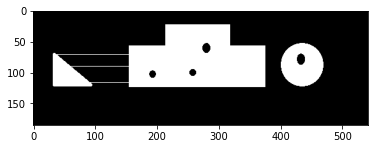

In [9]:
plt.imshow(img, cmap='gray')
img.shape

**2.a, Phép co**

In [10]:
kernel = np.ones((9,9), np.uint8)
img_erosion = cv2.erode(img, kernel)

**2.b, Phép giãn**

In [11]:
kernel = np.ones((9,9), np.uint8)
img_dilation = cv2.dilate(img, kernel)

**2.c, Phép mở**

In [12]:
kernel = np.ones((9,9), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

**2.d, Phép đóng**

In [13]:
kernel = np.ones((9,9), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

**2.e, Hiện thị kết quả và nhận xét**

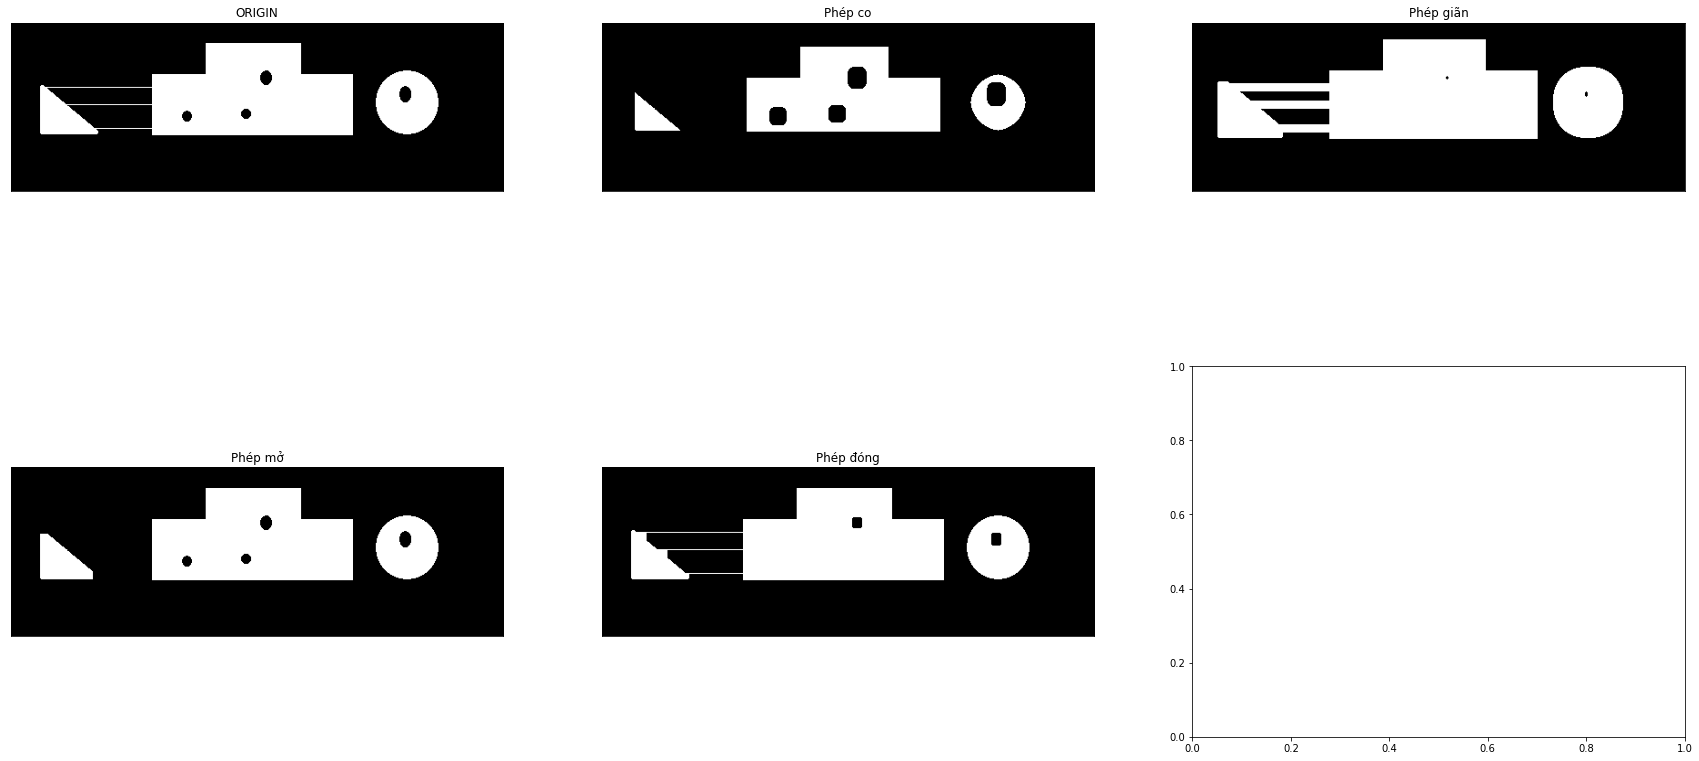

In [14]:
plt.subplots(2, 3, figsize=(30,15))
plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('ORIGIN'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img_erosion, cmap = 'gray')
plt.title('Phép co'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(img_dilation, cmap = 'gray')
plt.title('Phép giãn'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(opening, cmap = 'gray')
plt.title('Phép mở'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(closing, cmap = 'gray')
plt.title('Phép đóng'), plt.xticks([]), plt.yticks([])


plt.show()

**NHẬN XÉT:**  

1.   **Phép co** làm co lại các vùng màu trắng, khiến cho các đường mỏng bị mất đi, các lỗ hổng màu đen to lên
2.   **Phép giãn** làm dày hơn các vùng màu trắng, các lỗ hổng màu đen nhỏ hơn hoặc mất đi
3. **Phép mở** làm mất các đoạn quá mỏng, đường biên mượt hơn

4. **Phép đóng** bỏ đi được nhiều lỗ thủng, đường biên bị răng cưa

##**3)** Sau khi thực hiện nhị phân hoá ảnh, **thực hiện hàm** xác định biên, và số vùng liên thông trong ảnh##

**3.a, Xác định biên**

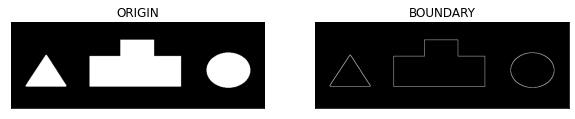

In [15]:
img = cv2.imread("image2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
img_erosion = cv2.erode(img, kernel)

boundary = img - img_erosion


plt.subplots(1, 2, figsize=(10,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('ORIGIN'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(boundary, cmap = 'gray')
plt.title('BOUNDARY'), plt.xticks([]), plt.yticks([])

plt.show()

**3.b, Xác định số vùng liên thông**

In [16]:
contours,hierarchy = cv2.findContours(img, 1, 2)
print("Số vùng liên thông trong ảnh là :", len(contours))

Số vùng liên thông trong ảnh là : 3


**NHẬN XÉT:** Thuật toán có sẵn của OpenCV đã xác định tốt đường biên và số vùng liên thông

##**4) Thực hiện** tính toán các đặc trưng vùng: diện tích, chu vi của vùng##

In [17]:
img = cv2.imread("image2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

contours,hierarchy = cv2.findContours(img, 1, 2)

In [18]:
i=1
for cnt in contours:
  area = cv2.contourArea(cnt)
  perimeter = cv2.arcLength(cnt,True)

  print("Vùng {}: có diện tích là {}, chu vi là {}".format(i, area, perimeter))
  i +=1

Vùng 1: có diện tích là 4485.5, chu vi là 310.4924215078354
Vùng 2: có diện tích là 7993.0, chu vi là 338.04876935482025
Vùng 3: có diện tích là 22141.0, chu vi là 712.8284270763397


**NHẬN XÉT:** Thuật toán có sẵn của OpenCV đã xác định tốt số vùng liên thông, chu vi và diện tích của các vùng liên thông.

##**5) Thực hiện** phép phương pháp template matching tìm người trong bức hình##

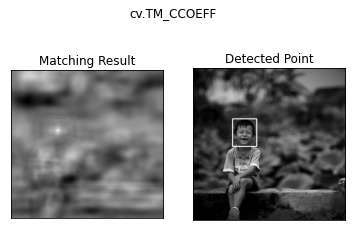

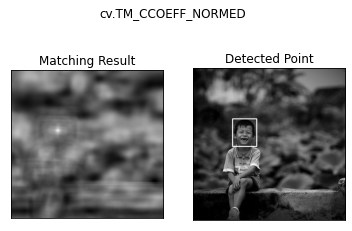

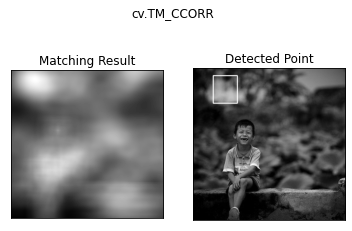

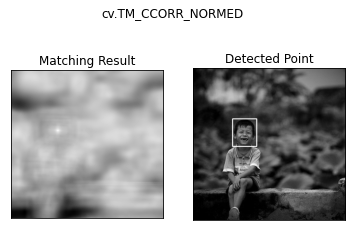

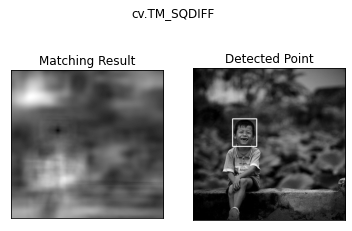

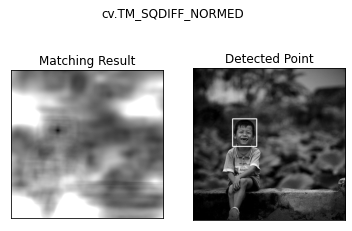

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('human.jpg',0)
img2 = img.copy()
template = cv.imread('template.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

**Nhận xét:** Có 6 phương thức *template matching* trong OpenCV, lần lượt là : 
1.   TM_CCOEFF
2.   TM_CCOEFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_SQDIFF
6. TM_SQDIFF_NORMED

Với trường hợp cụ thể như bức ảnh và template như trên, phương thức "TM_CCORR" đã xác định sai vị trí mặt người, còn 5 phương pháp còn lại đã xác định thành công.

